In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pydub
from pydub import AudioSegment
import IPython
import numpy as np
import wave

C:\Users\Welcome\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
import os
import librosa
import numpy as np
from sklearn.decomposition import FastICA

# Define the path to the folder containing audio files
folder_path = 'C:/Users/Welcome/LCA-ML/Audio/Male/PTDB-TUG'

# Initialize an empty list to store audio data
audio_data = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        # Load audio file
        file_path = os.path.join(folder_path, filename)
        y, sr = librosa.load(file_path, sr=None)
        audio_data.append(y)

# Convert the list of audio data to a NumPy array
# audio_data = np.vstack(audio_data)
max_length = max(len(y) for y in audio_data)
audio_data_padded = [np.pad(y, (0, max_length - len(y))) if len(y) < max_length else y for y in audio_data]
audio_data = np.vstack(audio_data_padded)

# Perform ICA
ica = FastICA(n_components=3)  # Define the number of components
ica_result = ica.fit_transform(audio_data.T)  # Transpose data for sklearn ICA

# Visualize or analyze the ICA results as needed


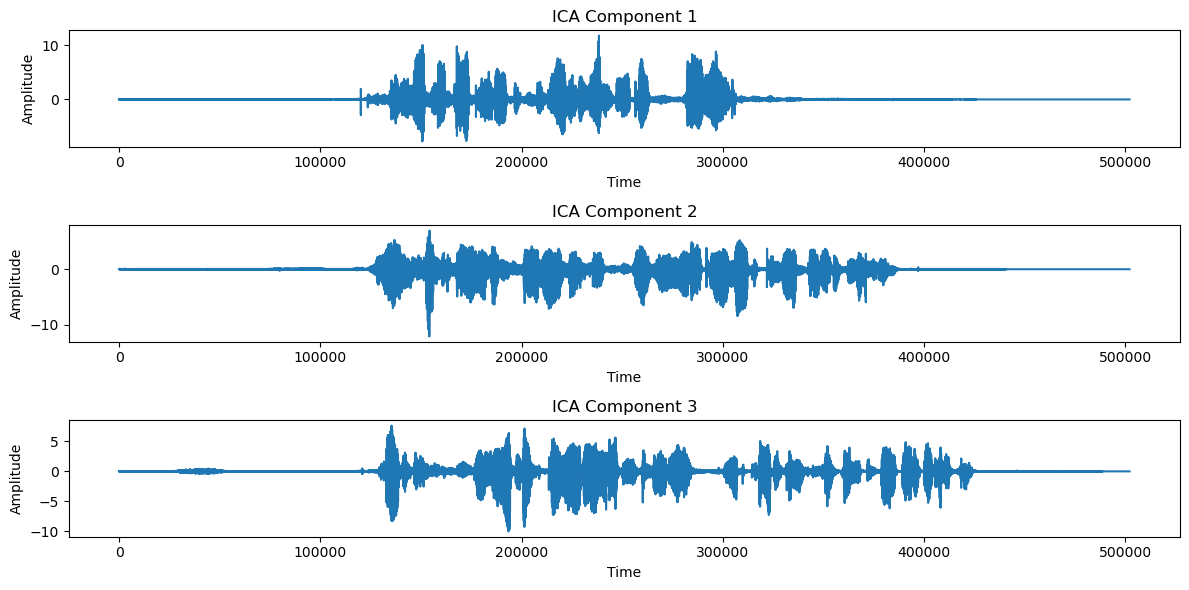

In [4]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Define the path to the folder containing audio files
folder_path = 'C:/Users/Welcome/LCA-ML/Audio/Male/PTDB-TUG'

# Initialize an empty list to store audio data
audio_data = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        # Load audio file
        file_path = os.path.join(folder_path, filename)
        y, sr = librosa.load(file_path, sr=None)
        audio_data.append(y)

# Convert the list of audio data to a NumPy array
max_length = max(len(y) for y in audio_data)
audio_data_padded = [np.pad(y, (0, max_length - len(y))) if len(y) < max_length else y for y in audio_data]
audio_data = np.vstack(audio_data_padded)

# Perform ICA
ica = FastICA(n_components=3)  # Define the number of components
ica_result = ica.fit_transform(audio_data.T)  # Transpose data for sklearn ICA

# Visualize the ICA components
plt.figure(figsize=(12, 6))
for i in range(ica_result.shape[1]):
    plt.subplot(3, 1, i+1)
    plt.plot(ica_result[:, i])
    plt.title(f'ICA Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [5]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from IPython.display import Audio
import soundfile as sf

# Define the path to the folder containing audio files
folder_path = 'C:/Users/Welcome/LCA-ML/Audio/Male/PTDB-TUG'
# Initialize an empty list to store audio data
audio_data = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        # Load audio file
        file_path = os.path.join(folder_path, filename)
        y, sr = librosa.load(file_path, sr=None)
        audio_data.append(y)

# Convert the list of audio data to a NumPy array
max_length = max(len(y) for y in audio_data)
audio_data_padded = [np.pad(y, (0, max_length - len(y))) if len(y) < max_length else y for y in audio_data]
audio_data = np.vstack(audio_data_padded)
# Perform ICA
ica = FastICA(n_components=3)  # Define the number of components
ica_result = ica.fit_transform(audio_data.T)  # Transpose data for sklearn ICA

# Save the separated audio signals as audio files
for i, separated_audio in enumerate(ica_result.T):
    output_filename = f'separated_audio_{i}.wav'
    sf.write(output_filename, separated_audio, sr)

    # Print the filename for reference
    print(f'Separated audio {i+1} saved as: {output_filename}')

    # Play the audio
    display(Audio(output_filename))


Separated audio 1 saved as: separated_audio_0.wav


Separated audio 2 saved as: separated_audio_1.wav


Separated audio 3 saved as: separated_audio_2.wav
